# Exploratory Data Analysis Làm Quen - Titanic Dataset
- Dữ liệu lấy từ competion trang Kaggle - Titanic 
- Việc phân tích khám phá dữ liệu EDA này là 1 bước sẽ trợ giúp trong phần tiếp cận, xây dựng mô hình học tập có giám sát - Machine Learning
# Nhập dữ liệu và kiểm tra ban đầu
- Để đọc dữ liệu, chúng ta sẽ dùng thư viện pandas và func read_csv()


In [2]:
# Đầu tiên là phải nhập các thư viện cần sử dụng
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [4]:
# Chúng ta bắt đầu nào. 
# Nhập dữ liệu từ file csv
df_train = pd.read_csv("../Data/train.csv")
df_test = pd.read_csv("../Data/test.csv")

df_train.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Sử dụng .info() để kiếm tra các loiaj dữ liệu, giá trị bị thiếu, ...
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Nhìn vào thông tin ở trên, ta thấy Cột Tuổi chỉ có 714 dữ liệu. Như vậy còn thiếu gần 200 dữ liệu. 
Ngoài ra còn có thể sử dụng .describe() để kiếm tra thông tin tóm tắt của các cột dữ liệu.


In [20]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

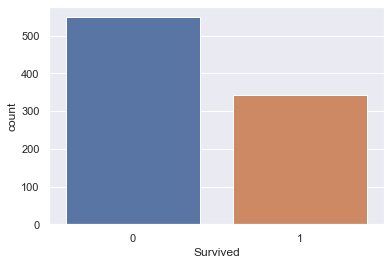

In [6]:
# Dùng seaborn để thể hiện các dữ liệu 1 cách trực quan hơn bằng đồ thị
sns.countplot(x='Survived', data=df_train)

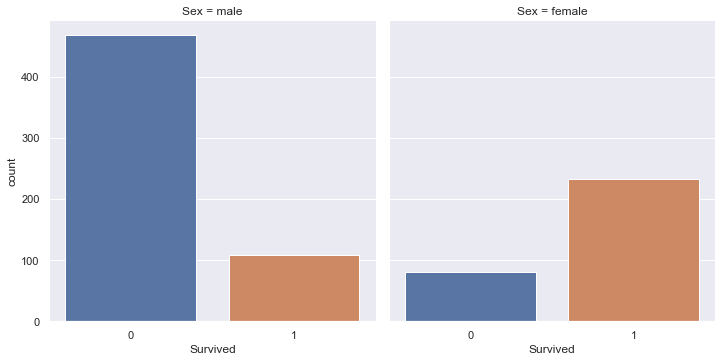

In [9]:
# Kiếm tra xe có mối liên hệ nào giữa sự việc sống sót và giới tính hay ko 
sns.catplot(x='Survived', col='Sex', kind='count', data=df_train)

Nhìn vào đồ thị trên, ta có thể thấy tỉ lệ sống sót của Nữ sẽ lớn hơn Nam. Ta sẽ kiếm tra 1 số thông tin liên quan đến số người sống sót, tỉ lệ.

In [16]:
# Dùng .groupby
df_train.groupby(['Sex']).Survived.sum() # Vì sống sót là 1 nên tổng của cột chính là tổng số người sống sót

Sex
female    233
male      109
Name: Survived, dtype: int64

In [15]:
# Tính tỉ lệ sống sót theo giới tính
print(df_train[df_train.Sex == "female"].Survived.sum()/df_train[df_train.Sex == "female"].Survived.count())
print(df_train[df_train.Sex == "male"].Survived.sum()/df_train[df_train.Sex == "male"].Survived.count())


0.7420382165605095
0.18890814558058924


Tiếp theo, ta thấy có cột Khoang - PClass. Theo suy đoán thì chắc có thể những người ở những khoang cao cấp hơn thì sẽ an toàn hơn, có cơ hội sống sót hơn. Chúng ta hãy thử kiếm tra xem. và kiếm tra luôn theo dl  điểm đến


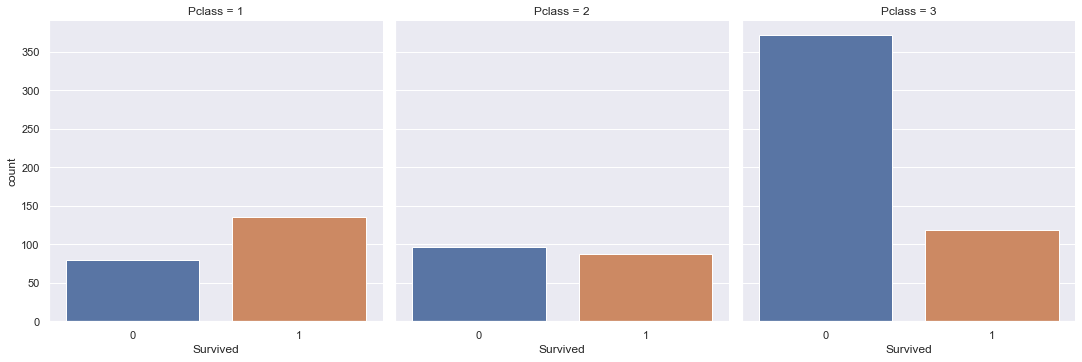

In [18]:
# Dùng seaborn thể hiện số lượng hành khách sống 
sns.catplot(x="Survived", col="Pclass", kind="count", data=df_train)

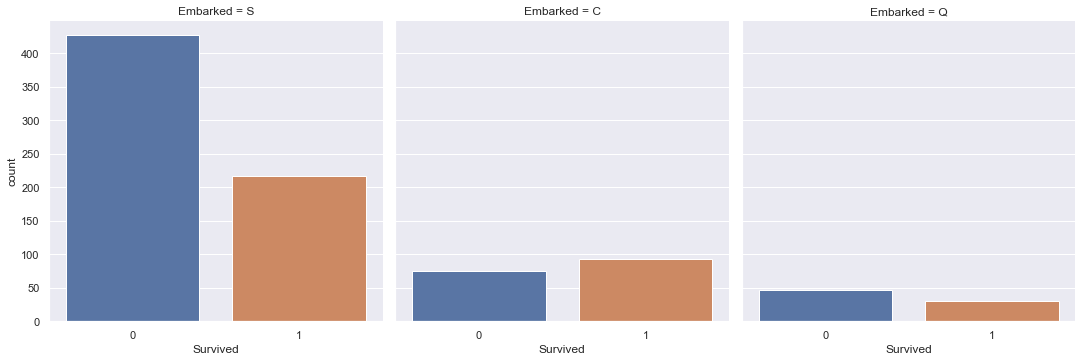

In [19]:
sns.catplot(x="Survived", col="Embarked", kind="count", data=df_train)

Như vậy, sau 2 biều đồ thanh trên thì ta có thể nhận xét là cơ hội sống sót của những hành khách ở Khoang cao cấp hơn (1, 2) và những người không đến Southamton là cao hơn so với những người còn lại